## Importing Libraries & Datasets 

In this section, I'll be importing all the necessary libraries and datasets. For more information, feel free to reference the report.

In [1]:
#importing 

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Finding my current working directory 
import os 
print(os.getcwd())

/home/atp001/COGS118A_FinalProj


In [3]:
tt = pd.read_csv('/home/atp001/COGS118A_FinalProj/tictactoe/tic-tac-toe.data')
ld = pd.read_csv('/home/atp001/COGS118A_FinalProj/liverdisease/Indian Liver Patient Dataset (ILPD).csv')
ir = pd.read_csv('/home/atp001/COGS118A_FinalProj/iris/iris.data')

## Cleaning Data 
In this section, I'll be making the data easier to understand, as well as cleaning it. 

In [4]:
#Renaming Columns to understand the positions better 
tt.columns = ['top_left', 'top_middle', 'top_right','middle_left', 'middle_middle', 'middle_right',
              'bottom_left', 'bottom_middle', 'bottom_right', 'outcome']

#Replacing the values in the columns 'x' and 'o'
tt.replace({'x': 1, 'o': 0, 'b': -1}, inplace=True)

#Converting the 'outcome' column to numeric
tt['outcome'] = tt['outcome'].apply(lambda x: 1 if x == 'positive' else 0)

#Making sure all columns are ints 
tt.iloc[:, :-1] = tt.iloc[:, :-1].astype('int64')

tt = tt.dropna()

tt.head()

/tmp/ipykernel_5850/2325703727.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tt.replace({'x': 1, 'o': 0, 'b': -1}, inplace=True)


,top_left,top_middle,top_right,middle_left,middle_middle,middle_right,bottom_left,bottom_middle,bottom_right,outcome
0,1,1,1,1,0,0,0,1,0,1
1,1,1,1,1,0,0,0,0,1,1
2,1,1,1,1,0,0,0,-1,-1,1
3,1,1,1,1,0,0,-1,0,-1,1
4,1,1,1,1,0,0,-1,-1,0,1


In [5]:
column_names = [
    'Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 
    'Alanine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Proteins', 
    'Albumin', 'Albumin_and_Globulin_Ratio', 'Class']

ld.columns = column_names

#Converting gender into ints
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ld['Gender'] = label_encoder.fit_transform(ld['Gender'])

ld = ld.dropna()

ld.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Class
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [6]:
from sklearn.datasets import load_iris
data = load_iris()

#Creating a df for features & target 
ir = pd.DataFrame(data.data, columns=data.feature_names)
ir['species'] = pd.Series(data.target)

# Check for missing values
if ir.isnull().sum().any():
    print("Missing values detected")
    ir = ir.dropna()  

#Mapping the numeric target to species names for better readability
species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
ir['species'] = ir['species'].map(species_map)

#Duplicate dropping 
ir = ir.drop_duplicates()

# Scaling the features
scaler = StandardScaler()
X_ir = ir.drop('species', axis=1)
X_ir_scaled = scaler.fit_transform(X_ir)

y_ir = ir['species']

ir.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Splitting Data
This section will deal with splitting data into training and test sets. 

In [7]:
X_tt = tt.drop('outcome', axis=1) 
y_tt = tt['outcome'] 

scaler = StandardScaler()
X_tt = scaler.fit_transform(X_tt)

X_tt_train, X_tt_test, y_tt_train, y_tt_test = train_test_split(X_tt, y_tt, test_size = 0.2, random_state = 42)

In [8]:
X_ld = ld.drop('Class', axis=1) 
y_ld = ld['Class']  

X_ld = scaler.fit_transform(X_ld)

X_ld_train, X_ld_test, y_ld_train, y_ld_test = train_test_split(X_ld, y_ld, test_size = 0.2, random_state = 42)

In [9]:
X_ir = ir.drop('species', axis=1)  
y_ir = ir['species']  

X_ir = scaler.fit_transform(X_ir)

X_ir_train, X_ir_test, y_ir_train, y_ir_test = train_test_split(X_ir, y_ir, test_size = 0.2, random_state = 42)

## Training Classifiers
Classifiers: Random Forest, Gradient Boosting, Logistic Regression 

In [10]:
# Initialize models
lr_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# For Tic-Tac-Toe (tt)
# Logistic Regression
lr_model.fit(X_tt_train, y_tt_train)
tt_lr_pred = lr_model.predict(X_tt_test)
tt_lr_acc = accuracy_score(y_tt_test, tt_lr_pred)

# Random Forest
rf_model.fit(X_tt_train, y_tt_train)
tt_rf_pred = rf_model.predict(X_tt_test)
tt_rf_acc = accuracy_score(y_tt_test, tt_rf_pred)

# Gradient Boosting
gb_model.fit(X_tt_train, y_tt_train)
tt_gb_pred = gb_model.predict(X_tt_test)
tt_gb_acc = accuracy_score(y_tt_test, tt_gb_pred)

print("Tic-Tac-Toe (tt) Model Evaluation")
print(f"Logistic Regression Accuracy: {tt_lr_acc}")
print(f"Random Forest Accuracy: {tt_rf_acc}")
print(f"Gradient Boosting Accuracy: {tt_gb_acc}")
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_tt_test, tt_lr_pred))
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_tt_test, tt_lr_pred))

# For Liver Disease (ld)
# Logistic Regression
lr_model.fit(X_ld_train, y_ld_train)
ld_lr_pred = lr_model.predict(X_ld_test)
ld_lr_acc = accuracy_score(y_ld_test, ld_lr_pred)

# Random Forest
rf_model.fit(X_ld_train, y_ld_train)
ld_rf_pred = rf_model.predict(X_ld_test)
ld_rf_acc = accuracy_score(y_ld_test, ld_rf_pred)

# Gradient Boosting
gb_model.fit(X_ld_train, y_ld_train)
ld_gb_pred = gb_model.predict(X_ld_test)
ld_gb_acc = accuracy_score(y_ld_test, ld_gb_pred)

print("\nLiver Disease (ld) Model Evaluation")
print(f"Logistic Regression Accuracy: {ld_lr_acc}")
print(f"Random Forest Accuracy: {ld_rf_acc}")
print(f"Gradient Boosting Accuracy: {ld_gb_acc}")
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_ld_test, ld_lr_pred))
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_ld_test, ld_lr_pred))

# For Iris (ir)
# Logistic Regression
lr_model.fit(X_ir_train, y_ir_train)
ir_lr_pred = lr_model.predict(X_ir_test)
ir_lr_acc = accuracy_score(y_ir_test, ir_lr_pred)

# Random Forest
rf_model.fit(X_ir_train, y_ir_train)
ir_rf_pred = rf_model.predict(X_ir_test)
ir_rf_acc = accuracy_score(y_ir_test, ir_rf_pred)

# Gradient Boosting
gb_model.fit(X_ir_train, y_ir_train)
ir_gb_pred = gb_model.predict(X_ir_test)
ir_gb_acc = accuracy_score(y_ir_test, ir_gb_pred)

print("\nIris (ir) Model Evaluation")
print(f"Logistic Regression Accuracy: {ir_lr_acc}")
print(f"Random Forest Accuracy: {ir_rf_acc}")
print(f"Gradient Boosting Accuracy: {ir_gb_acc}")
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_ir_test, ir_lr_pred))
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_ir_test, ir_lr_pred))

Tic-Tac-Toe (tt) Model Evaluation
Logistic Regression Accuracy: 0.703125
Random Forest Accuracy: 0.9583333333333334
Gradient Boosting Accuracy: 0.921875

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.78      0.21      0.33        67
           1       0.70      0.97      0.81       125

    accuracy                           0.70       192
   macro avg       0.74      0.59      0.57       192
weighted avg       0.72      0.70      0.64       192


Confusion Matrix (Logistic Regression):
[[ 14  53]
 [  4 121]]

Liver Disease (ld) Model Evaluation
Logistic Regression Accuracy: 0.7068965517241379
Random Forest Accuracy: 0.75
Gradient Boosting Accuracy: 0.75

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           1       0.77      0.87      0.82        86
           2       0.39      0.23      0.29        30

    accuracy                           0.71       11

## Performing Cross-Validation 
Finding the best hyperparameters!

In [11]:
# Tic-Tac-Toe (tt)
tt_lr_cv = cross_val_score(lr_model, X_tt, y_tt, cv=5, scoring='accuracy')
tt_rf_cv = cross_val_score(rf_model, X_tt, y_tt, cv=5, scoring='accuracy')
tt_gb_cv = cross_val_score(gb_model, X_tt, y_tt, cv=5, scoring='accuracy')

# Liver Disease (ld)
ld_lr_cv = cross_val_score(lr_model, X_ld, y_ld, cv=5, scoring='accuracy')
ld_rf_cv = cross_val_score(rf_model, X_ld, y_ld, cv=5, scoring='accuracy')
ld_gb_cv = cross_val_score(gb_model, X_ld, y_ld, cv=5, scoring='accuracy')

# Iris (ir)
ir_lr_cv = cross_val_score(lr_model, X_ir, y_ir, cv=5, scoring='accuracy')
ir_rf_cv = cross_val_score(rf_model, X_ir, y_ir, cv=5, scoring='accuracy')
ir_gb_cv = cross_val_score(gb_model, X_ir, y_ir, cv=5, scoring='accuracy')

# Print cross-validation results
print("Tic-Tac-Toe (tt) Cross-Validation Scores:")
print(f"Logistic Regression: {tt_lr_cv.mean()} (Std: {tt_lr_cv.std()})")
print(f"Random Forest: {tt_rf_cv.mean()} (Std: {tt_rf_cv.std()})")
print(f"Gradient Boosting: {tt_gb_cv.mean()} (Std: {tt_gb_cv.std()})")

print("\nLiver Disease (ld) Cross-Validation Scores:")
print(f"Logistic Regression: {ld_lr_cv.mean()} (Std: {ld_lr_cv.std()})")
print(f"Random Forest: {ld_rf_cv.mean()} (Std: {ld_rf_cv.std()})")
print(f"Gradient Boosting: {ld_gb_cv.mean()} (Std: {ld_gb_cv.std()})")

print("\nIris (ir) Cross-Validation Scores:")
print(f"Logistic Regression: {ir_lr_cv.mean()} (Std: {ir_lr_cv.std()})")
print(f"Random Forest: {ir_rf_cv.mean()} (Std: {ir_rf_cv.std()})")
print(f"Gradient Boosting: {ir_gb_cv.mean()} (Std: {ir_gb_cv.std()})")

Tic-Tac-Toe (tt) Cross-Validation Scores:
Logistic Regression: 0.5883998691099477 (Std: 0.10630679823641924)
Random Forest: 0.815363219895288 (Std: 0.1436025518206805)
Gradient Boosting: 0.8111910994764397 (Std: 0.14172846706717324)

Liver Disease (ld) Cross-Validation Scores:
Logistic Regression: 0.7145577211394303 (Std: 0.020804139721876863)
Random Forest: 0.6988605697151424 (Std: 0.056659672862552565)
Gradient Boosting: 0.6781709145427287 (Std: 0.0360105583890951)

Iris (ir) Cross-Validation Scores:
Logistic Regression: 0.9533333333333334 (Std: 0.03399346342395189)
Random Forest: 0.9666666666666668 (Std: 0.02108185106778919)
Gradient Boosting: 0.9666666666666668 (Std: 0.02108185106778919)


## Evaluating Model Accuracy 


In [12]:
print("Tic-Tac-Toe (tt) Model Evaluation")
print("Logistic Regression Accuracy:", accuracy_score(y_tt_test, tt_lr_pred))
print("Random Forest Accuracy:", accuracy_score(y_tt_test, tt_rf_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_tt_test, tt_gb_pred))

# Classification Report and Confusion Matrix for Logistic Regression (Tic-Tac-Toe)
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_tt_test, tt_lr_pred))

print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_tt_test, tt_lr_pred))


# Evaluate the models on Liver Disease (ld)
print("\nLiver Disease (ld) Model Evaluation")
print("Logistic Regression Accuracy:", accuracy_score(y_ld_test, ld_lr_pred))
print("Random Forest Accuracy:", accuracy_score(y_ld_test, ld_rf_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_ld_test, ld_gb_pred))

# Classification Report and Confusion Matrix for Logistic Regression (Liver Disease)
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_ld_test, ld_lr_pred))

print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_ld_test, ld_lr_pred))


# Evaluate the models on Iris (ir)
print("\nIris (ir) Model Evaluation")
print("Logistic Regression Accuracy:", accuracy_score(y_ir_test, ir_lr_pred))
print("Random Forest Accuracy:", accuracy_score(y_ir_test, ir_rf_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_ir_test, ir_gb_pred))

# Classification Report and Confusion Matrix for Logistic Regression (Iris)
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_ir_test, ir_lr_pred))

print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_ir_test, ir_lr_pred))

Tic-Tac-Toe (tt) Model Evaluation
Logistic Regression Accuracy: 0.703125
Random Forest Accuracy: 0.9583333333333334
Gradient Boosting Accuracy: 0.921875

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.78      0.21      0.33        67
           1       0.70      0.97      0.81       125

    accuracy                           0.70       192
   macro avg       0.74      0.59      0.57       192
weighted avg       0.72      0.70      0.64       192


Confusion Matrix (Logistic Regression):
[[ 14  53]
 [  4 121]]

Liver Disease (ld) Model Evaluation
Logistic Regression Accuracy: 0.7068965517241379
Random Forest Accuracy: 0.75
Gradient Boosting Accuracy: 0.75

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           1       0.77      0.87      0.82        86
           2       0.39      0.23      0.29        30

    accuracy                           0.71       11

## Plotting Data
Heatmaps & Accuracy Curves 

Tic-Tac-Toe (tt) - Logistic Regression Accuracy: 0.703125

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.78      0.21      0.33        67
           1       0.70      0.97      0.81       125

    accuracy                           0.70       192
   macro avg       0.74      0.59      0.57       192
weighted avg       0.72      0.70      0.64       192



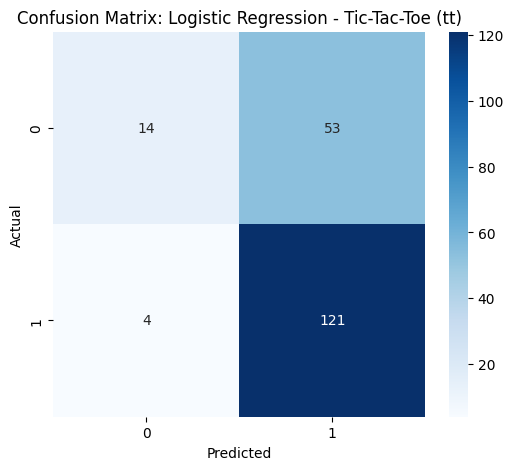

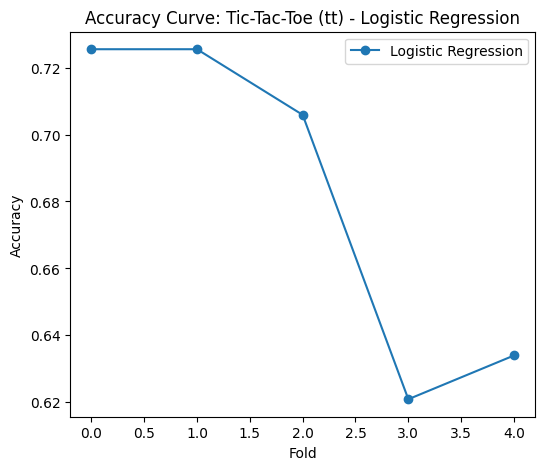

Liver Disease (ld) - Logistic Regression Accuracy: 0.7068965517241379

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           1       0.77      0.87      0.82        86
           2       0.39      0.23      0.29        30

    accuracy                           0.71       116
   macro avg       0.58      0.55      0.55       116
weighted avg       0.67      0.71      0.68       116



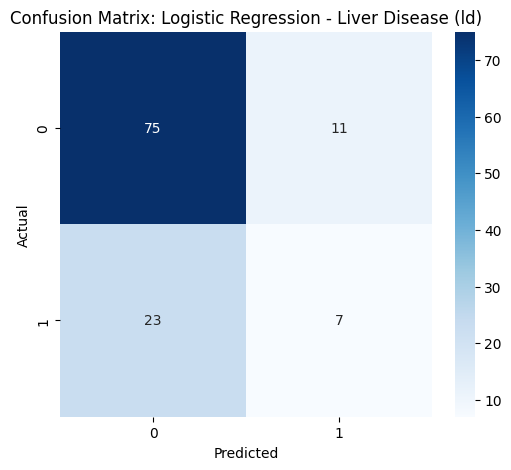

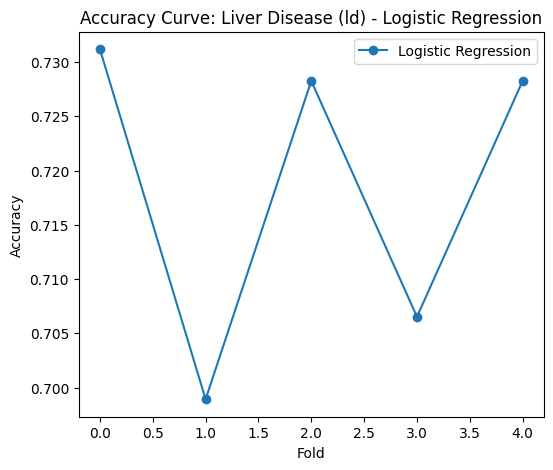

Iris (ir) - Logistic Regression Accuracy: 1.0

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



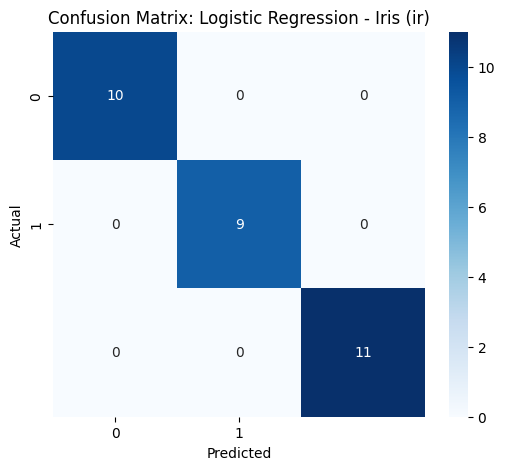

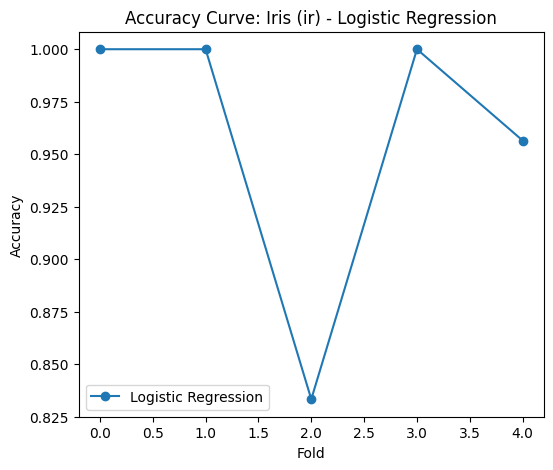

Tic-Tac-Toe (tt) - Random Forest Accuracy: 0.9479166666666666

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        67
           1       0.93      1.00      0.96       125

    accuracy                           0.95       192
   macro avg       0.96      0.93      0.94       192
weighted avg       0.95      0.95      0.95       192



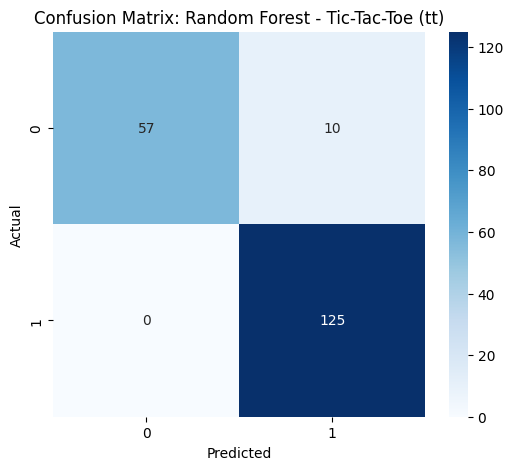

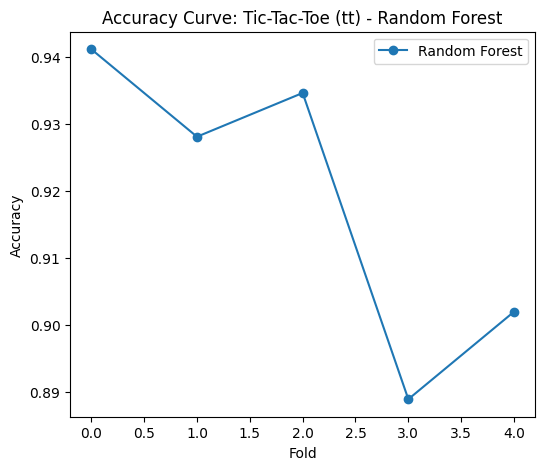

Liver Disease (ld) - Random Forest Accuracy: 0.75

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.79      0.90      0.84        86
           2       0.53      0.33      0.41        30

    accuracy                           0.75       116
   macro avg       0.66      0.61      0.62       116
weighted avg       0.72      0.75      0.73       116



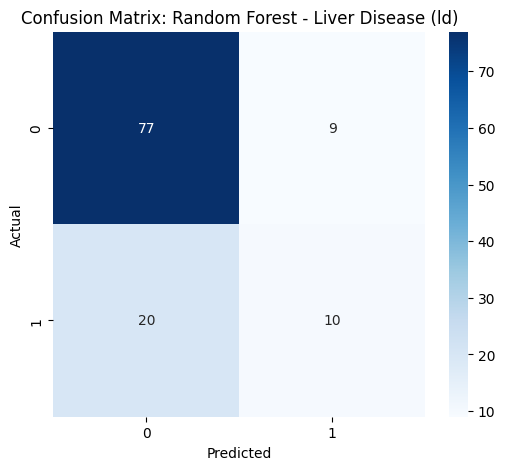

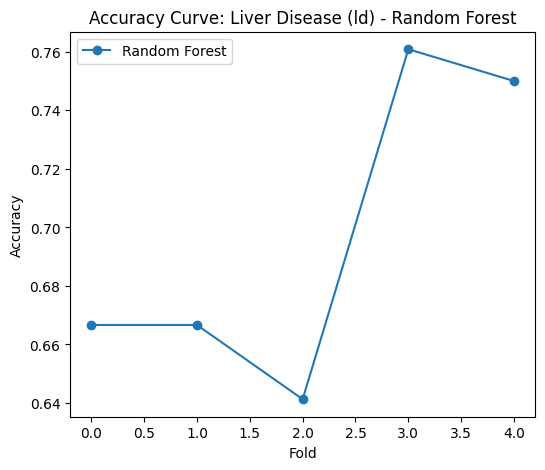

Iris (ir) - Random Forest Accuracy: 1.0

Classification Report (Random Forest):
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



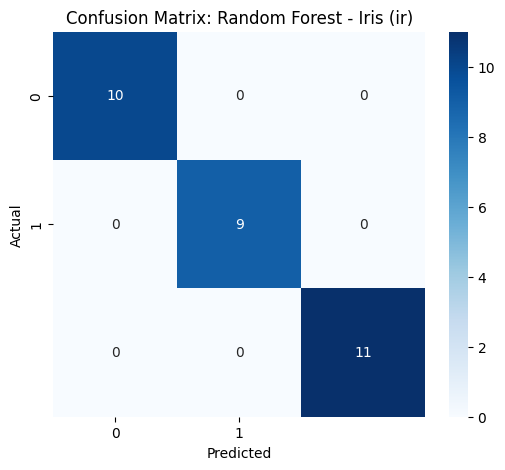

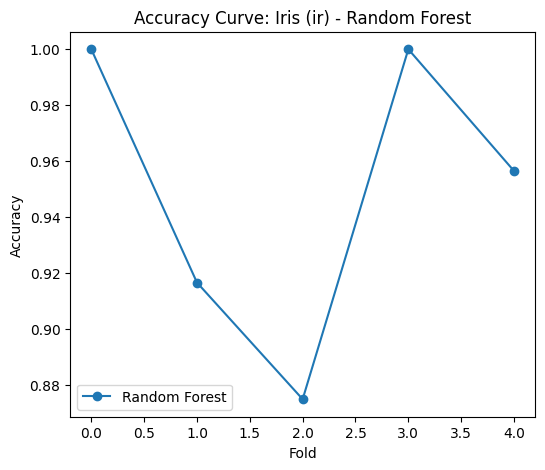

Tic-Tac-Toe (tt) - Gradient Boosting Accuracy: 0.921875

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       1.00      0.78      0.87        67
           1       0.89      1.00      0.94       125

    accuracy                           0.92       192
   macro avg       0.95      0.89      0.91       192
weighted avg       0.93      0.92      0.92       192



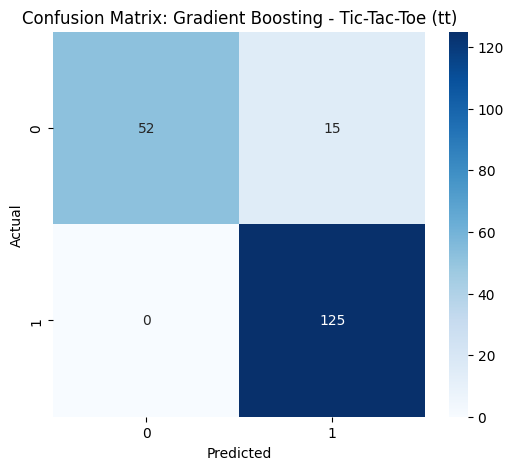

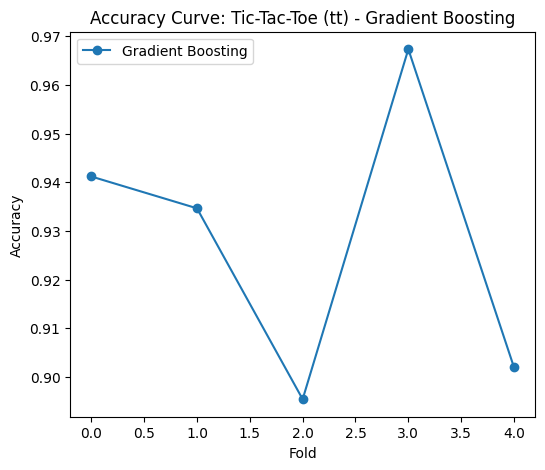

Liver Disease (ld) - Gradient Boosting Accuracy: 0.75

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           1       0.79      0.90      0.84        86
           2       0.53      0.33      0.41        30

    accuracy                           0.75       116
   macro avg       0.66      0.61      0.62       116
weighted avg       0.72      0.75      0.73       116



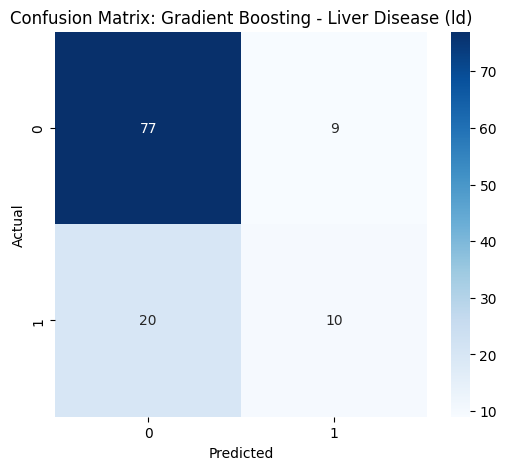

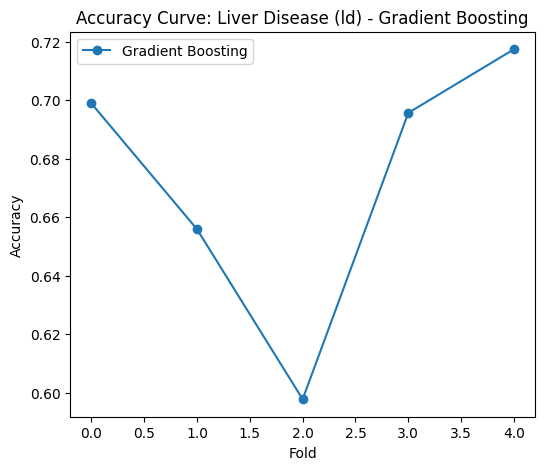

Iris (ir) - Gradient Boosting Accuracy: 1.0

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



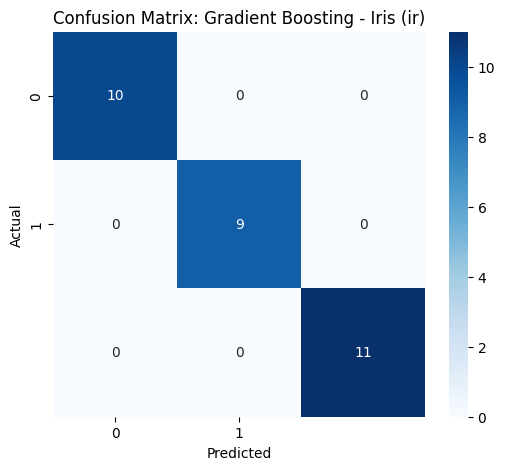

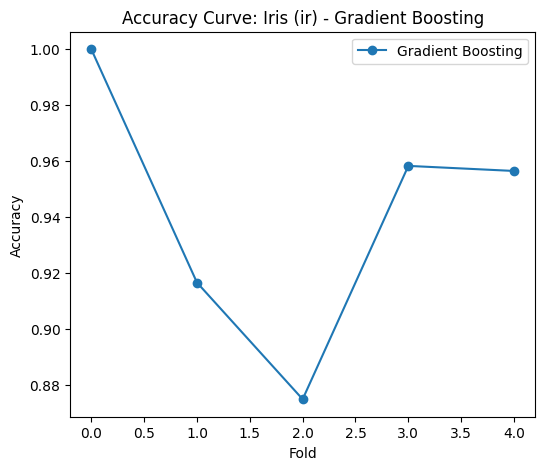

In [18]:
datasets = {
    'Tic-Tac-Toe (tt)': (X_tt_train, X_tt_test, y_tt_train, y_tt_test),
    'Liver Disease (ld)': (X_ld_train, X_ld_test, y_ld_train, y_ld_test),
    'Iris (ir)': (X_ir_train, X_ir_test, y_ir_train, y_ir_test)
}

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Function to plot confusion matrix heatmap
def plot_confusion_matrix(model, X_test, y_test, model_name, dataset_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix: {model_name} - {dataset_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to plot accuracy curve (cross-validation score curve)
def plot_accuracy_curve(model, X, y, model_name, dataset_name):
    cv_scores = cross_val_score(model, X, y, cv=5)
    
    plt.figure(figsize=(6, 5))
    plt.plot(cv_scores, marker='o', label=model_name)
    plt.title(f'Accuracy Curve: {dataset_name} - {model_name}')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Training, testing, and plotting for each model and dataset
for model_name, model in models.items():
    for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Accuracy score
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{dataset_name} - {model_name} Accuracy: {accuracy}')
        
        # Classification report
        print(f'\nClassification Report ({model_name}):')
        print(classification_report(y_test, y_pred))
        
        # Confusion matrix heatmap
        plot_confusion_matrix(model, X_test, y_test, model_name, dataset_name)
        
        # Accuracy curve (cross-validation)
        plot_accuracy_curve(model, X_train, y_train, model_name, dataset_name)